# Optimalization - find minimum of a function using SciPy

The optimization means a problem of finding numerically minimums (or maximums or zeros) of a function. The function is called cost function, or objective function, or energy.

Source:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
- https://scipy-lectures.org/advanced/mathematical_optimization/index.html

In [95]:
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.optimize import minimize, minimize_scalar

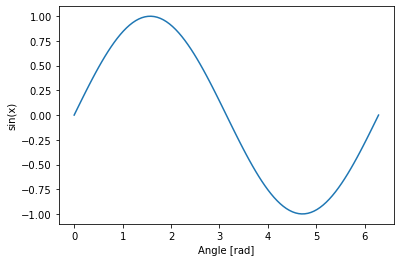

Scalar method: Brent , success: True , minimum: [ 4.712388979734998 , -1.0 ]
Scalar method: Golden , success: True , minimum: [ 4.712388988119073 , -1.0 ]


In [96]:
def func_sin(x):
    return math.sin(x)

def func_sin_array(x):
    return np.array([func_sin(xi) for xi in x])

x = np.linspace(0, 2*np.pi, 100)

plt.plot(x, func_sin_array(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

for method in ['Brent', 'Golden']:
    # useful to specify close interval to search
    result = minimize_scalar(func_sin, [4, 5], method=method)
    print ('Scalar method:', method, ', success:', result.success, ', minimum: [', result.x, ',', result.fun, ']')

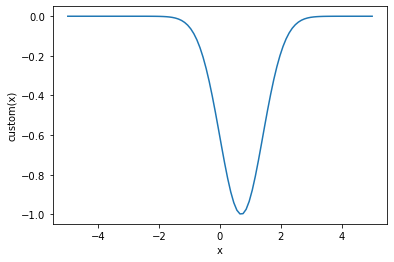

Scalar method: Brent , success: True , minimum: [ 0.6999999997839409 , -1.0 ]
Scalar method: Golden , success: True , minimum: [ 0.6999999965082352 , -1.0 ]


In [97]:
# More info: https://scipy-lectures.org/advanced/mathematical_optimization/index.html

def func_exp(x):
    return -np.exp(-(x - 0.7)**2)

def func_exp_array(x):
    return np.array([func_exp(xi) for xi in x])

x2 = np.linspace(-5, 5, 100)

plt.plot(x2, func_exp_array(x2))
plt.xlabel('x')
plt.ylabel('custom(x)')
plt.axis('tight')
plt.show()

for method in ['Brent', 'Golden']:
    result = minimize_scalar(func_exp, [0, 1], method=method)
    print ('Scalar method:', method, ', success:', result.success, ', minimum: [', result.x, ',', result.fun, ']')

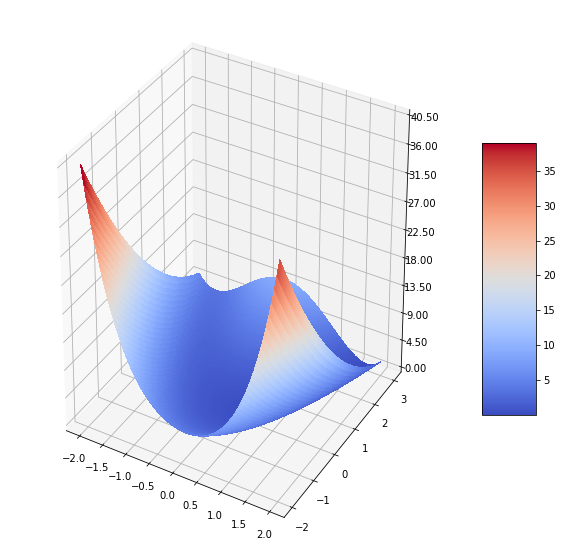

In [98]:
# Show 3D representation of Rosenbrock function
# - adapted from https://www.cc.gatech.edu/classes/AY2015/cs2316_fall/codesamples/rosenbrock_demo.py

import matplotlib.pyplot as plot
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

fig = plot.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

s = 0.05   # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-2, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-2, 3.+s, s)   #evenly instead of stepping...
    
# Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

# Rosenbrock function w/ two parameters using numpy Arrays
Z = 0.5*(1.-X)**2 + 1.0*(Y-X*X)**2

# try cmap=cm.coolwarm vs cmap=cm.jet
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plot.show()

In [99]:
# More info:
# - https://docs.scipy.org/doc/scipy/reference/optimize.html
# - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

def func_rosenbrock(x):
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

for method in [
    'Nelder-Mead',
    'Powell',
    'CG',
    'BFGS',
    'L-BFGS-B',
    'TNC',
    'COBYLA',
    'SLSQP']:
    result = minimize(func_rosenbrock, [2, -1], method=method)
    print ('Method:', method, ', success:', result.success, ', minimum:', result.fun, 'x:', result.x)

Method: Nelder-Mead , success: True , minimum: 1.11527915993744e-10 x: [1.00001481 1.00002828]
Method: Powell , success: True , minimum: 2.391234618951192e-30 x: [1. 1.]
Method: CG , success: True , minimum: 1.6486281937428067e-11 x: [0.99999426 0.99998864]
Method: BFGS , success: True , minimum: 4.9931043527025166e-15 x: [0.99999991 0.99999979]
Method: L-BFGS-B , success: True , minimum: 3.7328852106324297e-13 x: [1.00000053 1.00000057]
Method: TNC , success: True , minimum: 7.014903400494414e-08 x: [0.99962707 0.99922957]
Method: COBYLA , success: True , minimum: 1.7339665207898726e-06 x: [0.99835934 0.99609841]
Method: SLSQP , success: True , minimum: 9.926858237392154e-08 x: [1.00003255 0.99975088]
